## Astro 304 "Galaxies"

In [3]:
from code.plot_utils import plot_pretty
import numpy as np
from matplotlib import pylab as plt
from scipy.special import kn, iv
from code.setup.setup import data_home_dir

plot_pretty()

### Homework 3 (due Wednesday, May 3, 9pm)

<b>35 points (+5 extra credit)</b> 

You should make your homework available to me by the due date/time as an IPython (Jupyter) notebook via a github repository. I encourage you to discuss your work with others, but actual calculations and plots should be your own. All the data required for these exercises can be found in the data/ subdirectory at the same link as before. 

# <b>1) M/L ratios and IMF. (3 points)</b> 
In the end of the <a href="https://github.com/a-kravtsov/a304s17/blob/master/ex03_stellar_population_synthesis.ipynb">ex03 notebook</a> I used some examples of the stellar population synthesis calculations, which assumed Chabrier initial mass function (IMF) of stars to estimate $M_\star/L_r\approx 2$ for the Milky Way's color. Would the estimated $M_\star/L_r$ be larger or smaller, if the Salpeter IMF was assumed instead? Present an argument for your answer based on what we discussed about IMFs in class (see discussion and IMF related plots earlier in ex03 notebook to aid your answer).  

### <b>Answer:</b> 
Larger, since L~M^4 for a MS star, a top-heavy IMF will give you a higher total luminosity for the same mass, while a bottom-heavy IMF will give the opposite. Additionally the Salpeter IMF is bottom-heavy as compared to the Chabrier IMF, so we expect a higher mass to light ratio for the Salpeter IMF.

# <b>2) Dark matter halo of the Milky Way. (12 points)</b> 
For reasons that we will discuss a bit later in the course, dark matter halos are expected to have radial density profiles (density as a function of radial distance to the center) of the so-called Navarro-Frenk-White (NFW) form (<a href="http://adsabs.harvard.edu/abs/1997ApJ...490..493N">Navarro et al. 1997</a>):

$$\rho_{\rm dm}(r)=\frac{4\rho_s}{(r/r_s)(1+r/r_s)^2},$$

where $r_s$ is the *scale radius*, which corresponds to $r$ where logarithmic slope of the profile is -2, $\rho_s$ is density at $r=r_s$. 

## <b>a) 5 points.</b> Derive the analytic expression for the mass profile of a spherical NFW halo:
$$M(r)=4\pi\int\limits_0^r\rho(r)r^2dr$$
and express its normalization constant in terms of the mass within $r=250$ kpc, $M_{\rm h}(250\ \rm kpc)$. Use this expression to get the expression for the square of the circular velocity due to the halo, $V_{\rm circ}^2(r)$, and add it to the circular velocity due to the disk and spherical bulge (see script from ex04 below), so that you get the total circular velocity profile due to all three components (bulge, disk, dark matter). 

<function M250_norm at 0x1aa02daa0>


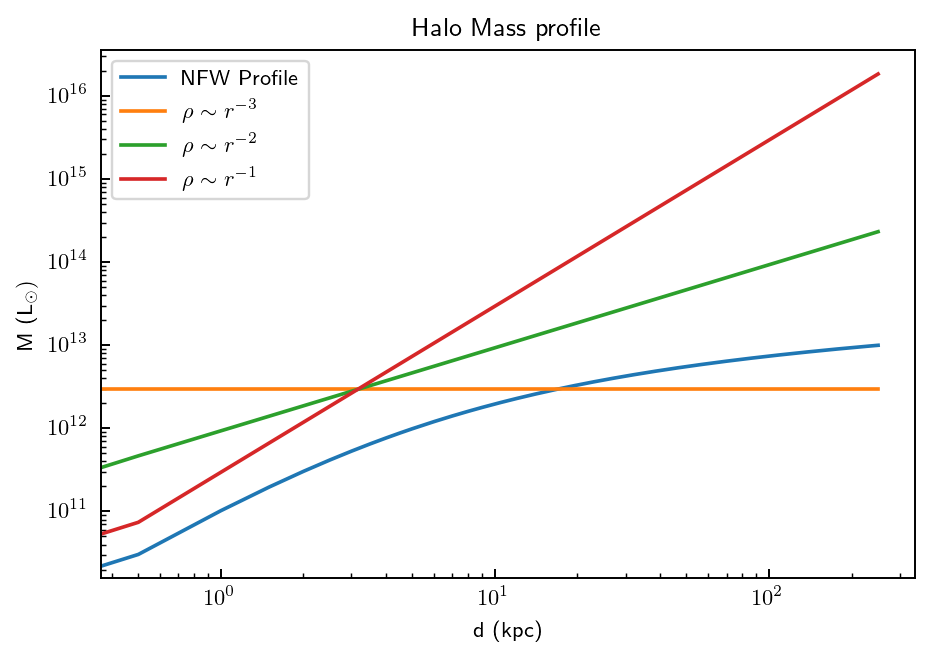

In [6]:
rs = 3.16
#rhos = 1e3
r250 = 250
M250 = 10**13
def rho_NFW(r, rs = rs, rhos = rhos):
    '''
    NFW density profile normalized via scale density rhos.
    
    '''
    top = 4*rhos
    bottom = (r/rs)*(1 + r/rs)**2
    rho = top / bottom
    return rho

#def M_NFW(r, rs = rs, rhos = rhos):
#    '''
#    all lengths in units of kpc
#    '''
#    M = 16 * np.pi * rhos * rs**3 * ( np.log(1 + r/rs) -(r/(r + rs)) )
#    return M
#
#M250 = M_NFW(r = 250)
#M250


def M250_norm(r, rs, M250):
    '''
    Calculate the normalization constant for an M_NFW profile in
    terms of the enclosed mass at 250 kpc. All lengths in units 
    of kpc, masses in units of solar masses.
    '''
    n = M250/( np.log( 1 + r250/rs ) - (r250 / (r250 + rs)) )
    return n

def M_NFW(r, rs, norm, Mfid):
    '''
    NFW profile all lengths in units of kpc, masses in units of solar masses
    
    Parameters
    ----------
    r (float)       : radius in kpc
    
    rs (float)      : scale radius in kpc
    
    norm (function) : function used to calculate normalization constant
    
    Returns
    -------
    M (float): Enclosed mass at radius r calculated using the provided 
               normalization.
    '''
    prof = np.log( 1 + r/rs ) - (r / (r + rs))
    print(norm)
    C = norm(r, rs, Mfid)
    M = C*prof
    return M
    

import matplotlib.pyplot as plt
import numpy as np

### Plot Density Profile
#r = np.linspace(0, 250, 500)
#plt.plot(r, rho_NFW(r), label = 'NFW Profile')
#plt.plot(r, 4*rhos*(r/rs)**-3, label = r'\( \rho \sim r^{-3} \)')
#plt.plot(r, 4*rhos*(r/rs)**-2, label = r'\( \rho \sim r^{-2} \)')
#plt.plot(r, 4*rhos*(r/rs)**-1, label = r'\( \rho \sim r^{-1} \)')
#plt.xscale('log')
#plt.yscale('log')
#plt.legend()
#plt.title('Halo Density Profile')
#plt.show()

### Plot Mass Profile to check that M250 --> correct value at r250
plt.plot(r, M_NFW(r, rs, M250_norm, M250), label = 'NFW Profile')
plt.xscale('log')
plt.yscale('log')
plt.plot(r, M250_norm(r, rs, M250) * (r/rs)**0, label = r'\( \rho \sim r^{-3} \)')
plt.plot(r, M250_norm(r, rs, M250) * (r/rs)**1, label = r'\( \rho \sim r^{-2} \)')
plt.plot(r, M250_norm(r, rs, M250) * (r/rs)**2, label = r'\( \rho \sim r^{-1} \)')
plt.title('Halo Mass profile')
plt.xlabel(' d \\text{(kpc)}  ')
plt.ylabel(' M \\text{(L_{{\odot}})} ')
plt.legend()
plt.show()

Successfully goes to $ 10^{13} ~ M_\odot $ at r250 and the slope is consistent with the expected NFW behavior at each regime, $ r << r_s $ , $ r \sim r_s $, and $ r >> r_s $. An exact normalization for the power laws isn't important for these purposes.

## <b>b) (7 points)</b> Plot the observed rotation measurements of stars and gas in the Milky Way, as shown in ex04 and script below. 
Plot the curve corresponding to the total 
 $V_{\rm circ}^2(r)$ you computed above for different values of $M_{\rm h}(250\ \rm kpc)$ and assuming $r_s\approx 20-30$ kpc. Find approximate value $M_{\rm h}(250\ \rm kpc)$ for which $V_{\rm circ}^2(r)$ describes observed rotation measurements well. 
 
Quote this mass and compare it to the stellar mass of the Milky Way disk, $M_\star\approx 7\times 10^{10}\ M_\odot$, estimated at the end of <a href="https://github.com/a-kravtsov/a304s17/blob/master/ex03_stellar_population_synthesis.ipynb">ex03 notebook</a>. What is the mass fraction of stars within 250 kpc of the Milky Way center? What is the mass-to-light ratio within 250 kpc? (i.e. $M_{\rm tot}(250\ kpc)/L_{\rm r,MW}$) How does it compare with the $M_\star/L_r$ you'd expect from the stellar population synthesis?
 


    LaTeX font style enabled for plotting.

    Use "cmap = get_cmap(data)" to compute a discretized      
    colormap for some 1D set of data.                         
[(1.0, 0.0, 0.0, 1.0), (1.0, 0.83382436323612785, 0.0, 1.0), (0.30918948566007398, 1.0, 0.0, 1.0), (0.0, 1.0, 0.52463196614175589, 1.0), (0.0, 0.61838487757605409, 1.0, 1.0), (0.21543948566007359, 0.0, 1.0, 1.0), (1.0, 0.0, 0.92757436323612774, 1.0)]
<function M250_norm at 0x1aa02daa0>
<function M250_norm at 0x1aa02daa0>
<function M250_norm at 0x1aa02daa0>
<function M250_norm at 0x1aa02daa0>
<function M250_norm at 0x1aa02daa0>
<function M250_norm at 0x1aa02daa0>
<function M250_norm at 0x1aa02daa0>


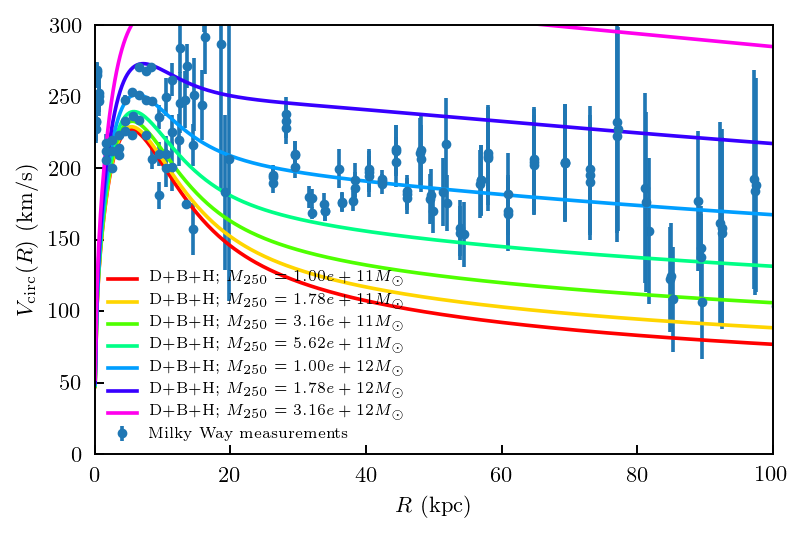

In [7]:
def V2_circ(r, rs, Mfidu, norm, Mmodel):
    '''
    M in solar masses, with a special form of G in units of
    pc km^2 s^-2. Lastly, r in units of kpc.
    
    Parameters
    ----------
    r (float)        : radius in kpc.
    
    rs (float)       : scale radius in kpc.
    
    Mfidu (float)    : Fiducial mass value at which the normalization 
                       constant is calculated.
    
    norm (function)  : Function that calculates the normalization constant
                       at the provided fiducial mass value.
    
    Mmodel (function): Model profile from which you calculate the circular
                       velocity.
                       
    Returns
    -------
    V2 (float): Circular velocity.
    '''
    M = Mmodel(r, rs, norm, Mfidu)
    GMdot = 4.3e-6
    V2 = GMdot * M / r
    return V2


# code for 2b
from code.plot_utils import plot_pretty
import numpy as np
from matplotlib import pylab as plt
from scipy.special import kn, iv
from code.setup.setup import data_home_dir

plot_pretty()

# read MW rotation measurement data
Rsun, Vsun, rMW, VcMW, eVcMW = np.loadtxt(data_home_dir()+'MW_rotcurve.txt', 
                                          unpack=True, 
                                          skiprows=15, usecols=(0,1,2,3,4))

y = np.linspace(0.01,20.,400)
# mass and disk scale length in Msun and kpc consistent with the Milky Way values
# mass accounts for stars (6e10 Msun) and gas (1e10 Msun)
Md = 7.e10; 
# MW disk scale length 
#<a href="http://adsabs.harvard.edu/abs/2016ApJ...831...71L">Licquia & Newman (2016)</a>
Rd = 2.63 
# circular velocity profile in the midplane of a thin exponential disk
Vcd = 2.074e-3 * np.sqrt(2.*Md/Rd*y**2*(kn(0,y)*iv(0.,y)-kn(1,y)*iv(1,y)))
r = y*2.*Rd

# bulge with the Hernquist (1990) density profile
Mb = 0.15*Md; rb = 1.
Vcb = np.sqrt(4.30131e4 * Mb*r/(r+rb)**2)/1.e5


# plot observations
plt.figure(figsize=(5,3.25))
plt.xlim(0.,100.); plt.ylim(0.,300.)
plt.xlabel(r'$R\rm\ (kpc)$'); plt.ylabel(r'$V_{\rm circ}(R)\ \mathrm{(km/s)}$')
plt.errorbar(rMW, VcMW, yerr=eVcMW, fmt='o', markersize=3, label='Milky Way measurements')

# plot model rotation curves for range of M250 values
M250s = np.logspace(11.0, 12.5, 7)

# create color map
import plot_tools
colors = plot_tools.get_cmap(M250s)
for M250, color in zip(M250s, colors):
    # DM halo NFW profile; M_250 an order of mag estimate.
    rs = 20.
    Vhalo2 = V2_circ(r, rs, M250, M250_norm, M_NFW)
    # combine velocities in quadrature
    vcirc = np.sqrt(Vcb**2+Vcd**2+Vhalo2)
    label=r'D+B+H; \( M_{{250}} = {0:0.2e} M_{{\odot}} \)'.format(M250)
    plt.plot(r, vcirc, c=color, label = label )
plt.legend(loc='lower left', frameon=False, fontsize=6)
plt.show()

To match the observed rotation curve, I require a DM halo of $ 10^{12}~ M_\odot $ with an $r_s = 20$ kpc; larger scale radii were avoided because they introduce an increasing $v_{circ}$ at $r > 80$ kpc that is inconsistent with the gradual fall-off seen in observations. These results agree with the values found by Battalgia et al. (2005) who determine MW halo mass to be $ 0.8^{+1.2}_{−0.2} \times 10^{12}~ M_\odot $ for $c \equiv r_{vir}/r_s = 18$. If we take $r_{250} \sim r_{vir} $ we estimate, for this work, $ c = r_{vir}/r_s = 250/20 = 25 $. Also roughly consistent with Battaglia et al. (2005). This result is also consistent with Kafle et al. (2014) who find $ M_{vir} = 0.80^{+0.31}_{-0.16} \times 10^{12} ~ M_{\odot }$ and $ c = 21.1^{+14.8}_{-8.3}$. While it may seem notable that they find a statistically lower halo mass than Battaglia et al. (2005) (and hence further from the halo mass estimated here), these results are still quite consistent when taking into account Kafle et al's higher $M_{disk} = 10^{11} M_{\odot} $ as opposed to our $M_{disk} = 7\times 10^{10} M_{\odot} $

### <b> What is the mass fraction of stars within 250 kpc of the Milky Way center? </b>    
$ f_{\star} = \frac{ M_{\star} } { M_{DM} } \approx \frac{ 6\times 10^{10}\ M_\odot } { 10^{12} M_\odot} = 0.06 $.   

### <b> What is the mass-to-light ratio within 250 kpc? (i.e. $M_{\rm tot}(250\ kpc)/L_{\rm r,MW}$) </b>    
$ M_{Sun,r} = 4.76 $ mag  (Blanton et al. 2003); $ M_{MW,r} = (-20.97 - 0.77) \text{ mag} = -20.20 $ mag (Licquia & Newman 2016)   


$ \implies L_{MW} = 10^{0.4(4.76 + 21.74)} L_\odot \simeq 4 \times 10^{10} L_\odot $   

$ \implies \frac { M_{\rm tot}(250\ kpc) } { L_{\rm r,MW} } \sim \frac { 10^{12} M_\odot } { 4\times 10^{10} L_\odot } = 25 $.

### <b>How does it compare with the $M_\star/L_r$ you'd expect from the stellar population synthesis? </b> 
Order of magnitude larger.

# <b>3) Compute $\epsilon_m$ for the MW. (5 points)</b>
Using your "best fit" $V_{\rm circ}(r)$ from the 2b above, compute the bar instability parameter for the Milky Way: 
$$\epsilon_{\rm m}=\frac{V_{\rm max}}{\sqrt{GM_{\rm d}/R_{\rm d}}},$$
where $V_{\rm max}=\max V_{\rm circ,tot}(r)$ is the maximum rotation velocity within the disk, $M_{\rm d}$ is mass of the disk and $R_{\rm d}$ is the exponential scale-length of the disk. 

Based on the result and what you've learned about Milky Way so far and bar instability criteria discussed in the <a href="https://github.com/a-kravtsov/a304s17/blob/master/ex04_lss_dark_matter.ipynb">ex04</a> notebook, is the Milky Way disk expected to be stable or unstable to bar instability? How does your conclusion correspond to what we know about the inner disk of the Milky Way and the MW analogues discussed in HW1? 

In [8]:
# best by-eye MW parameters from 2b
M250 = 1e12
rs = 20
Vhalo2 = V2_circ(r, rs, M250, M250_norm, M_NFW)

# combine velocities in quadrature
vcirc = np.sqrt(Vcb**2+Vcd**2+Vhalo2)
vmax = np.max(vcirc)
def eps_instab(Vmax, Mdisk, Rdisk):
    '''
    Mass in solar masses, scale length in kpc, velocity in km s^-1.
    '''
    GMdot = 4.3e-6
    e = Vmax/np.sqrt(GMdot*Mdisk/Rdisk)
    return e

print(r'V_max = {0:0.2f}'.format(vmax))
print(r'e_m = {0:0.2f}'.format(eps_instab(vmax, Md, Rd)))

<function M250_norm at 0x1aa02daa0>
V_max = 242.04
e_m = 0.72


# <b>4) Modern estimate of the MW+M31 mass using the Kahn-Woltjer method. (8 points)</b>
Summarize the argument behind the <a href="http://adsabs.harvard.edu/abs/1959ApJ...130..705K">Kahn-Woltjer (1959)</a> method of estimating the sum of total gravitating masses of the Milky Way and M31 galaxies discussed in the <a href="https://github.com/a-kravtsov/a304s17/blob/master/ex04_lss_dark_matter.ipynb">ex04</a> notebook and S 1.9.3 in the <a href="http://astro.uchicago.edu/~andrey/classes/a304s17/main.pdf">notes</a>. Use the modern measurements of the radial velocity with which these galaxies approach each other, $v_r\approx 109.3\pm 4.4$ km/s (<a href="http://adsabs.harvard.edu/abs/2012ApJ...753....7S">Sohn et al. 2012</a>) and distance between them, $r\approx 
770\pm 40$ kpc (<a href="http://adsabs.harvard.edu/abs/2008ApJ...678..187V">van der Marel & Guhathakurta 2008</a>) to estimate the sum of the MW and M31 masses. 

You will need to solve for $\eta$ numerically. You can use Scipy's fsolve routine, as shown in the example below.

In [9]:
from scipy.optimize import fsolve
import numpy as np


def examplefunc(x, a, b):
    return np.sin(a*x) - b*x 

a = 3.; b = .5
x = fsolve(examplefunc, x0=1., args=(a,b))[0]
print "numerical solution is x=%.3f, f(x)=%.g"%(x,examplefunc(x,a,b))


numerical solution is x=0.893, f(x)=-1e-16


In [11]:
from scipy.optimize import fsolve
import numpy as np

e  = 0.9999      # radial orbit
vr = 109.3       # km s^-1
r  = 770         # kpc
Tage = 13.7e9    # Tage in yr

def dlnr_dlnt(eta, e):
    '''
    Tage in units of years. Vr in units of km s^-1. r in units
    of kpc.
    '''
    yrDs   = 1./(525600. * 60)
    kmDkpc = 3.086e16 
    top = e*np.sin(eta)*(eta - e*np.sin(eta))
    bot = ( 1 - e*np.cos(eta) )**2
    RHS = top/bot
    LHS = (Tage/r * vr)/yrDs/kmDkpc
    return RHS - LHS

yr2s = 525600. * 60
kpc2km = 3.086e16
GMdot = 4.3e-6 # units of km^2 kpc s^-2
eta = fsolve(dlnr_dlnt , x0=8.34, args=(e))[0]
print("numerical solution is eta = {0:.3f}, "
      "dlnr/dlnt(eta) = {1:.3g}".format(eta, dlnr_dlnt(eta, e)) )
a = r/(1-e*np.cos(eta))
Mtot = ( (a**3)*kpc2km**2*(eta - e*np.sin(eta))**2) / ((GMdot)*(Tage*yr2s)**2 )
print 'semi-major axis a = {0:.3e}'.format(a), 'kpc'
Mmw  = 1e12
Mand = 1.5e12 

print('Estimated M_tot = {0:.2e}'.format(Mtot) )

numerical solution is eta = 8.619, dlnr/dlnt(eta) = -1.78e-15
semi-major axis a = 4.549e+02 kpc
Estimated M_tot = 6.97e+12


The calculated $ M_{MW} + M_{M31} $ is a factor of a few higher than expected. 

# <b>5) LSS of red and blue galaxies. (7 points)</b> 
The code from ex04 notebook included below shows how to select a region around the SDSS Great Wall and plot distribution of galaxies projected onto largest 2 of the three dimensions of the region. 

a) Add similar separate plots of the same region for elliptical and Scd galaxies of the same luminosity range using morphology probabilities we've used before. (2 points)

b) Plot distribution of elliptical and Scd galaxies in a zoom-in of a $\sim 10$ Mpc region around one of the prominent clusters that you can identify in the large-scale distribution (it's up to you which one you pick). (2 points)

c) Compare the structures in the spatial distributions of elliptical and late type galaxies on large-scales and around the cluster. Describe the most salient structures you see and the differences between the distributions. How would you interpret the difference and what would you cocnlude from it? (3 points)

In [12]:
# code for 5

from code.read_data import read_meert_catalog
# input phot_type selects photometry model fit:  1=best fit, 2=deVaucouleurs, 3=Sersic, 4=DeVExp, 5=SerExp
sdata, mdata, mnpdata, phot_r, mdatag, mnpdatag, morph = read_meert_catalog(phot_type=3)

from colossus.cosmology import cosmology

# set cosmology to the best values from 9-year WMAP data
cosmo = cosmology.setCosmology('WMAP9')

mmeert = mdata['m_tot']
# r-band extinction and k-correction (latter provided in the catalog in this case)
extm = mnpdata['extinction']; kcorr = mnpdata['kcorr']

# luminosity distance in Mpc
d_Lm = cosmo.luminosityDistance(sdata['z'])/cosmo.h

# absolute magnitude in the r-band corrected for extinction, evolution, and k-correction
Mmeert = mmeert - 5.0*np.log10(d_Lm/1e-5) - extm + 1.3*sdata['z'] - kcorr; 

# 4.67 is the r-band abs. magnitude of the Sun, so Lmeert is log10 L in Lsun
Lmeert =  0.4*(4.67-(Mmeert)); 
pE = morph['probaE']; pEll = morph['probaEll']; pS0  = morph['probaS0']; pSab = morph['probaSab']; pScd = morph['probaScd']; 


670722 galaxies in Meert et al. sample initially


/Users/thoyt/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


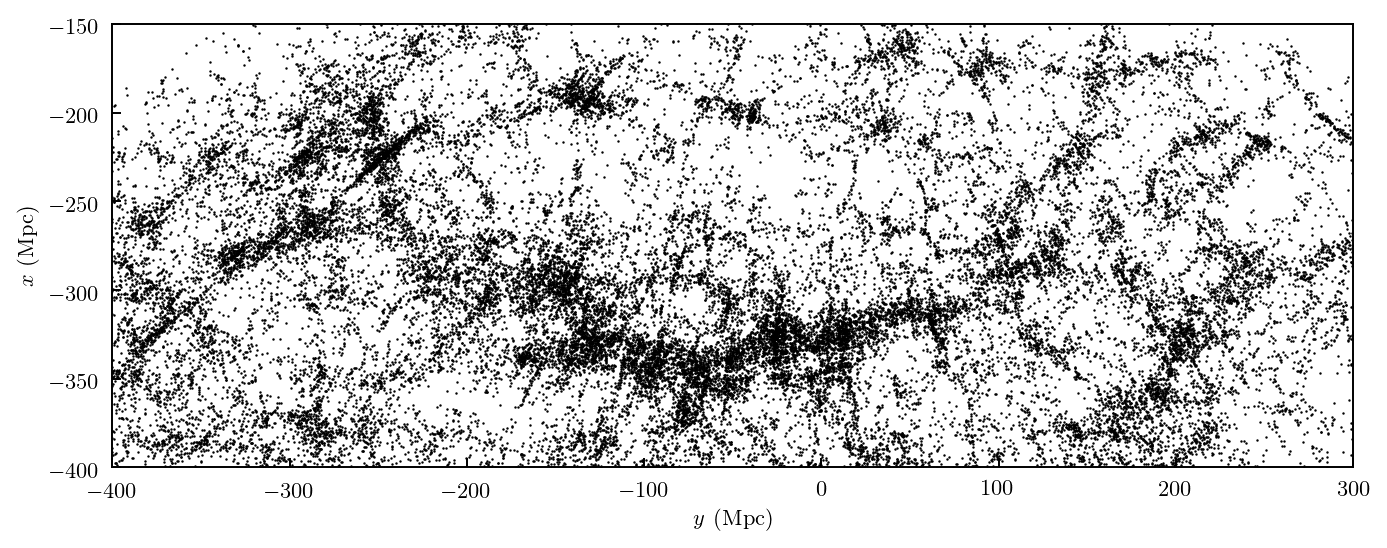

In [15]:
# code for 5, contd.

# apply cuts in M, RA, DEC, and z to select bright galaxies 
# in the region of the sky, where the Great Wall is located

isel = ((sdata['dec'] > -7) & (sdata['dec'] < 7) & 
        (sdata['ra'] > 80) & (sdata['ra'] < 280) & 
        (sdata['z'] > 0.01) & (sdata['z'] < 0.14) &
        (Mmeert<-20.))

gwdata = sdata[isel];

# compute "comoving" distance for plotting spatial coordinates 
# (see Appendix A.1-A.3 for difference between comoving and Luminosity distance)
d_C = d_Lm[isel]/(1. + gwdata['z'])

# construct 2D coordinates using RAs and d_C
# we are collapsing galaxies with different DECs onto 2D plane
# because the selected slice in DEC is only 14 degrees - pretty narrow 
Y = d_C * np.cos(gwdata['ra'] * np.pi / 180.) 
X = d_C * np.sin(gwdata['ra'] * np.pi / 180.)

fig = plt.figure(figsize=(8, 4))

# plot distribution of galaxies in the slice around the SDSS Great Wall
ax = plt.subplot(111, aspect='equal')
ax.scatter(X, Y, s=1, lw=0, c='k')

ax.set_xlim(-400, 300)
ax.set_ylim(-400, -150)

ax.set_xlabel(r'$y\ (\rm Mpc)$')
ax.set_ylabel(r'$x\ (\rm Mpc)$')

plt.show()

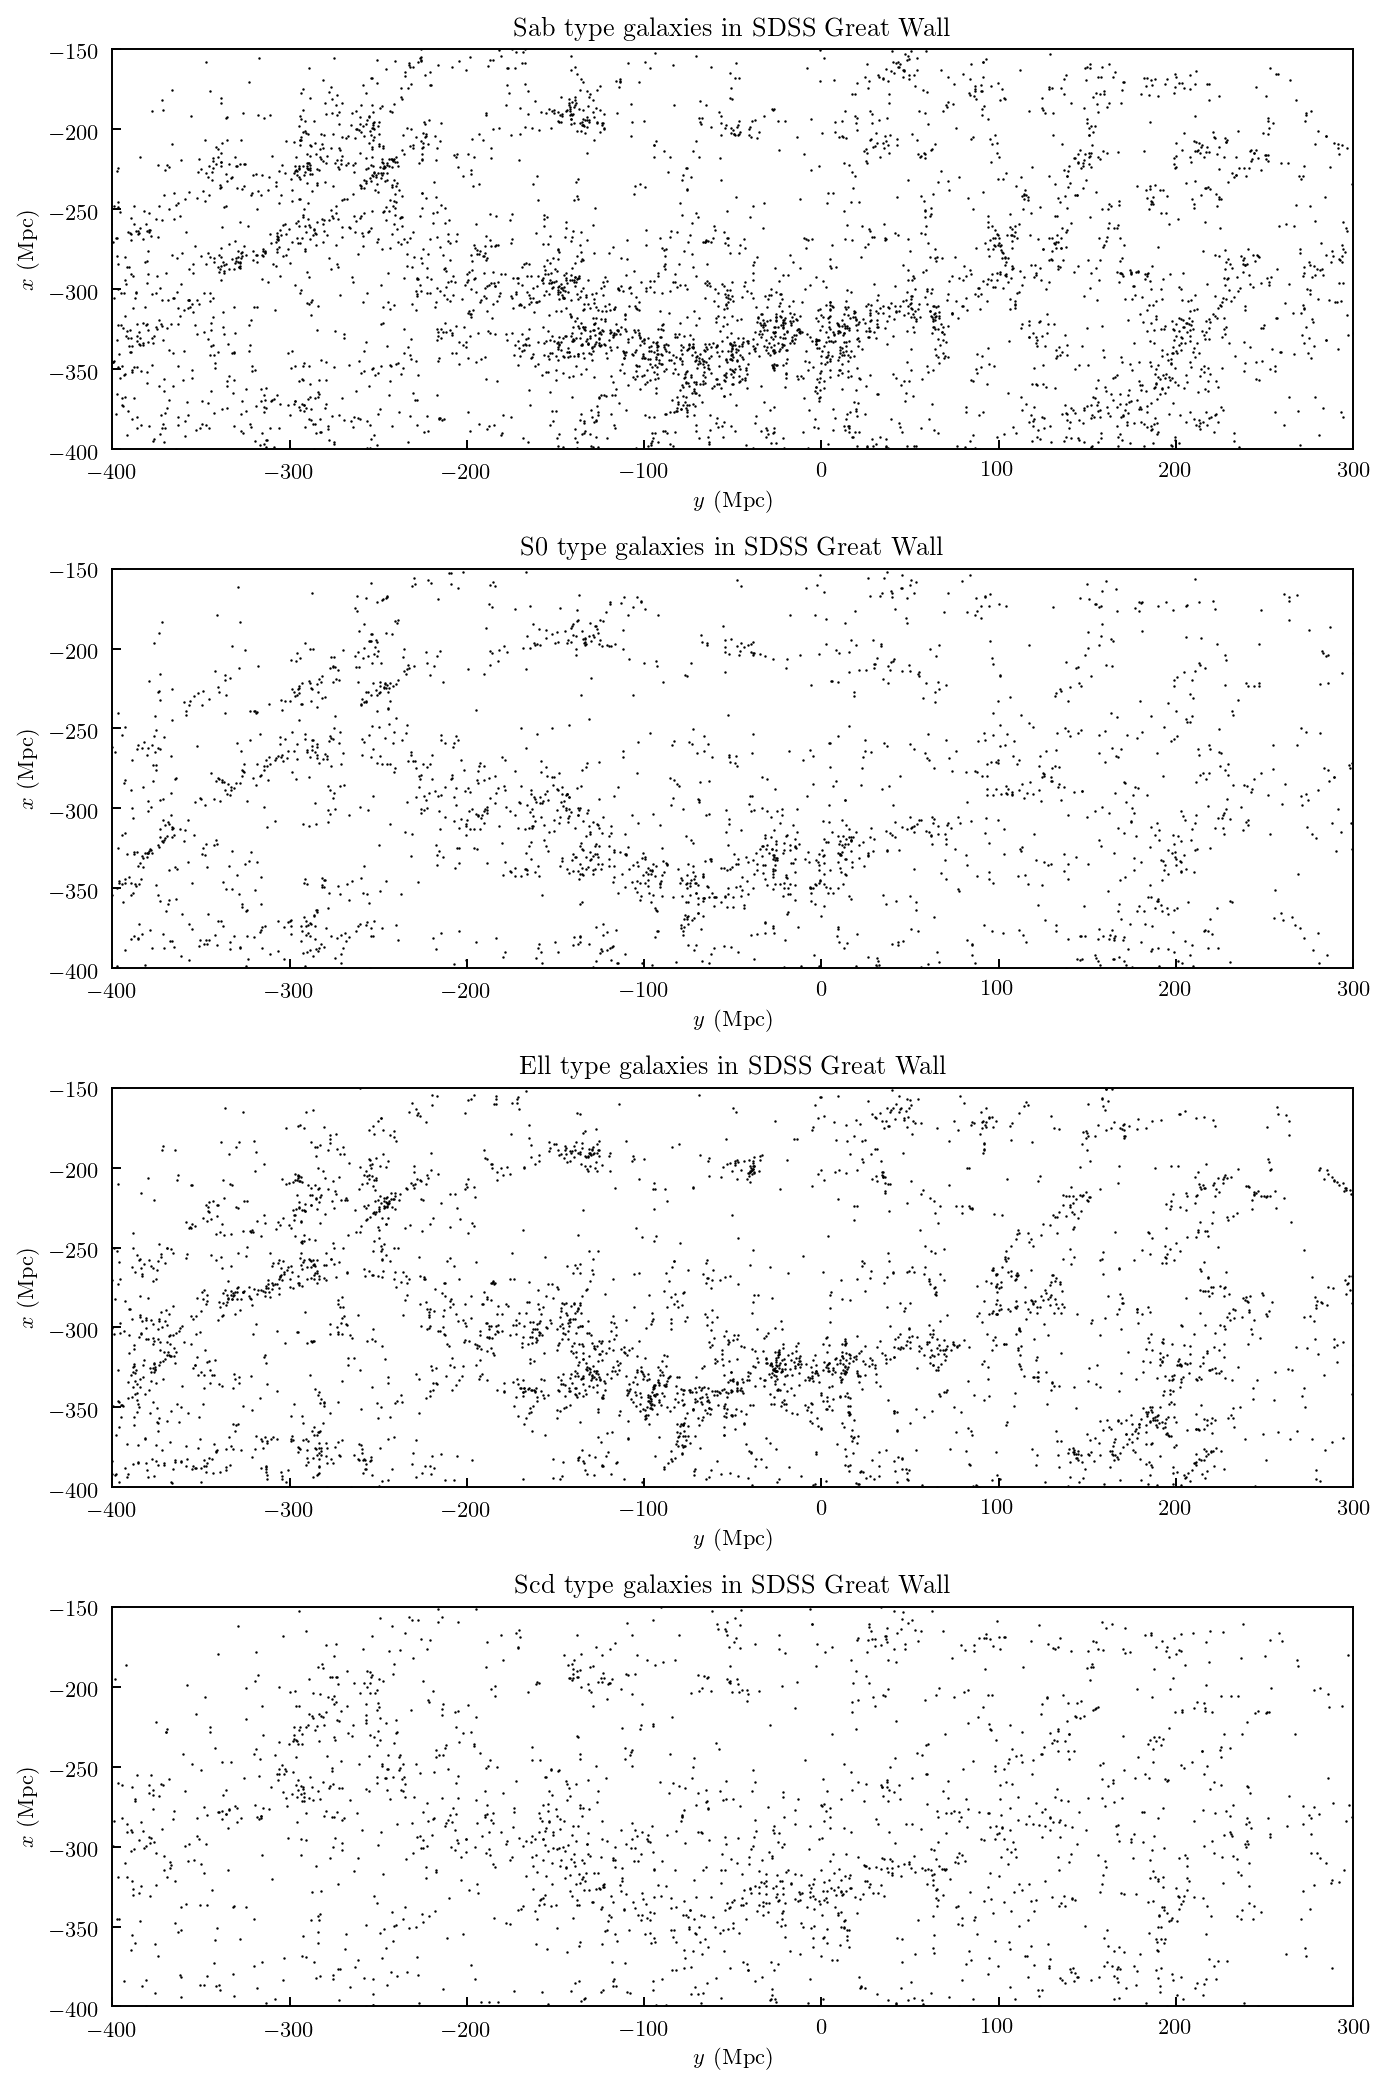

In [39]:
GWslice = ((sdata['dec'] > -7) & (sdata['dec'] < 7) & 
           (sdata['ra'] > 80) & (sdata['ra'] < 280) & 
           (sdata['z'] > 0.01) & (sdata['z'] < 0.14) &
           (Mmeert<-20.))

GWdata = sdata[GWslice]
GWmorph = morph[GWslice]
GWd_Lm = d_Lm[GWslice]
gtypes = ['Ell', 'S0', 'Sab', 'Scd']
morphlim = 0.7
gtypeslis = gal_type_slice(GWmorph, gtypes, morphlim)
figsize = (8, 12)
f, axs = plt.subplots(4,1, figsize = figsize)
for gtype, ax in zip(gtypeslis, axs):
    gtypesli = gtypeslis[gtype]
    gtypeGWdata = GWdata[gtypesli]
    # compute "comoving" distance for plotting spatial coordinates 
    # (see Appendix A.1-A.3 for difference between comoving and Luminosity distance)
    d_C = GWd_Lm[gtypesli]/(1. + gtypeGWdata['z'])

    # construct 2D coordinates using RAs and d_C
    # we are collapsing galaxies with different DECs onto 2D plane
    # because the selected slice in DEC is only 14 degrees - pretty narrow 
    Y = d_C * np.cos(gtypeGWdata['ra'] * np.pi / 180.) 
    X = d_C * np.sin(gtypeGWdata['ra'] * np.pi / 180.)


    # plot distribution of galaxies in the slice around the SDSS Great Wall
    ax.scatter(X, Y, s=1, lw=0, c='k')

    ax.set_xlim(-400, 300)
    ax.set_ylim(-400, -150)

    ax.set_xlabel(r'$y\ (\rm Mpc)$')
    ax.set_ylabel(r'$x\ (\rm Mpc)$')
    title = r'{0} type galaxies in SDSS Great Wall'.format(gtype)
    ax.set_title(title)
plt.show()

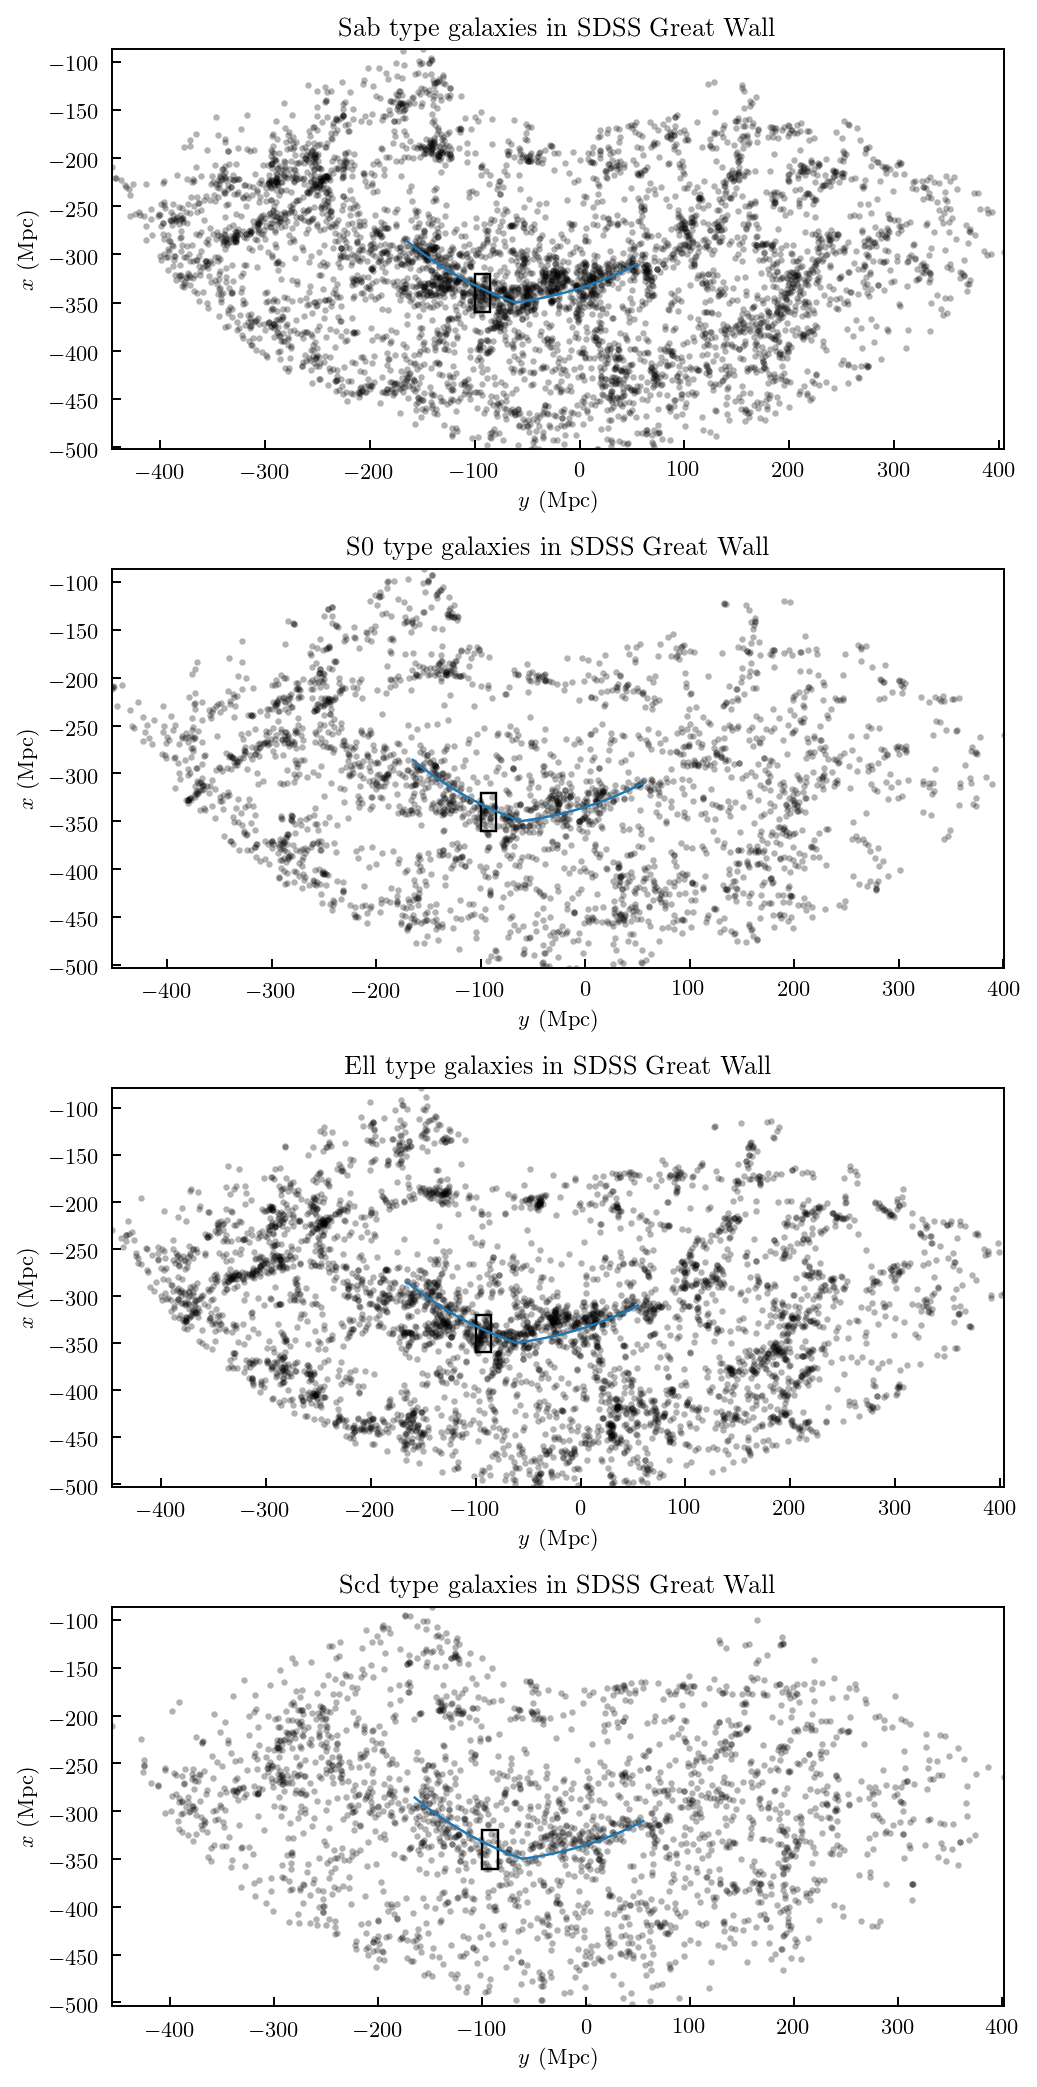

In [144]:
### gets slice for each galaxy type ###

def gal_type_slice(morph, galtypes, pmin):
    '''
    return dict of morph slices for the provided galaxy morphology
    for which p_galtype > pmin and p_galtype > all other p_galtype's.
    '''
    galtypeslices = {}
    for m in galtypes:
        mkey = 'proba{0}'.format(m)
        resttypes = list(set(galtypes) - set([m]))
        restkeys = ['proba{0}'.format(o) for o in resttypes]
        morphslice = ( (morph[mkey] >= morphlim) & (morph[mkey] >= morph[restkeys[0]]) &
                       (morph[mkey] >= morph[restkeys[1]]) & (morph[mkey] >= morph[restkeys[2]])
                     )
        galtypeslices[m] = morphslice
    return galtypeslices
    
# code for 5, contd.

# apply cuts in M, RA, DEC, and z to select bright galaxies 
# in the region of the sky, where the Great Wall is located

RAmin, RAmax = [100, 260]
zmin, zmax   = [0.04, 0.12]
GWslice = ((sdata['dec'] > -7) & (sdata['dec'] < 7) & 
           (sdata['ra'] > RAmin) & (sdata['ra'] < RAmax) & 
           (sdata['z'] > zmin) & (sdata['z'] < zmax) &
           (Mmeert<-20.))

GWdata = sdata[GWslice]
GWmorph = morph[GWslice]
GWd_Lm = d_Lm[GWslice]
gtypes = ['Ell', 'S0', 'Sab', 'Scd']
morphlim = 0.7
gtypeslis = gal_type_slice(GWmorph, gtypes, morphlim)

from matplotlib import patches
figsize = (6, 12)
f, axs = plt.subplots(4,1, figsize = figsize)
for gtype, ax in zip(gtypeslis, axs):
    gtypesli = gtypeslis[gtype]
    gtypeGWdata = GWdata[gtypesli]
    # compute "comoving" distance for plotting spatial coordinates 
    # (see Appendix A.1-A.3 for difference between comoving and Luminosity distance)
    d_C = GWd_Lm[gtypesli]/(1. + gtypeGWdata['z'])

    # construct 2D coordinates using RAs and d_C
    # we are collapsing galaxies with different DECs onto 2D plane
    # because the selected slice in DEC is only 14 degrees - pretty narrow 
    Y = d_C * np.cos(gtypeGWdata['ra'] * np.pi / 180.) 
    X = d_C * np.sin(gtypeGWdata['ra'] * np.pi / 180.)
    
    # plot disjoint "curve" to trace out the GW 
    dGW1 = np.linspace(315, 355, 100)
    dGW2 = np.linspace(355, 330, 100)
    dGW  = np.append(dGW1, dGW2)
    raGW = np.linspace(170, 210, 200)
    XGW  = dGW*np.sin(raGW * np.pi / 180.)
    YGW  = dGW*np.cos(raGW * np.pi / 180.)
    xlims = (np.min(X), np.max(X))
    ylims = (np.min(Y), np.max(Y))
    
    ax.add_patch(patches.Rectangle((-100, -360), width=15, 
                                height=40, fill = False, linewidth = 1))
    # plot distribution of galaxies in the slice around the SDSS Great Wall
    ax.scatter(X, Y, s=7, lw=0, c='k', alpha = 0.3)
    ax.plot(XGW, YGW, lw = 1)
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
#    ax.set_xlim(-400, 300)
#    ax.set_ylim(-400, -150)
    ax.set_xlabel(r'$y\ (\rm Mpc)$')
    ax.set_ylabel(r'$x\ (\rm Mpc)$')
    title = r'{0} type galaxies in SDSS Great Wall'.format(gtype)
    ax.set_title(title)
plt.show()

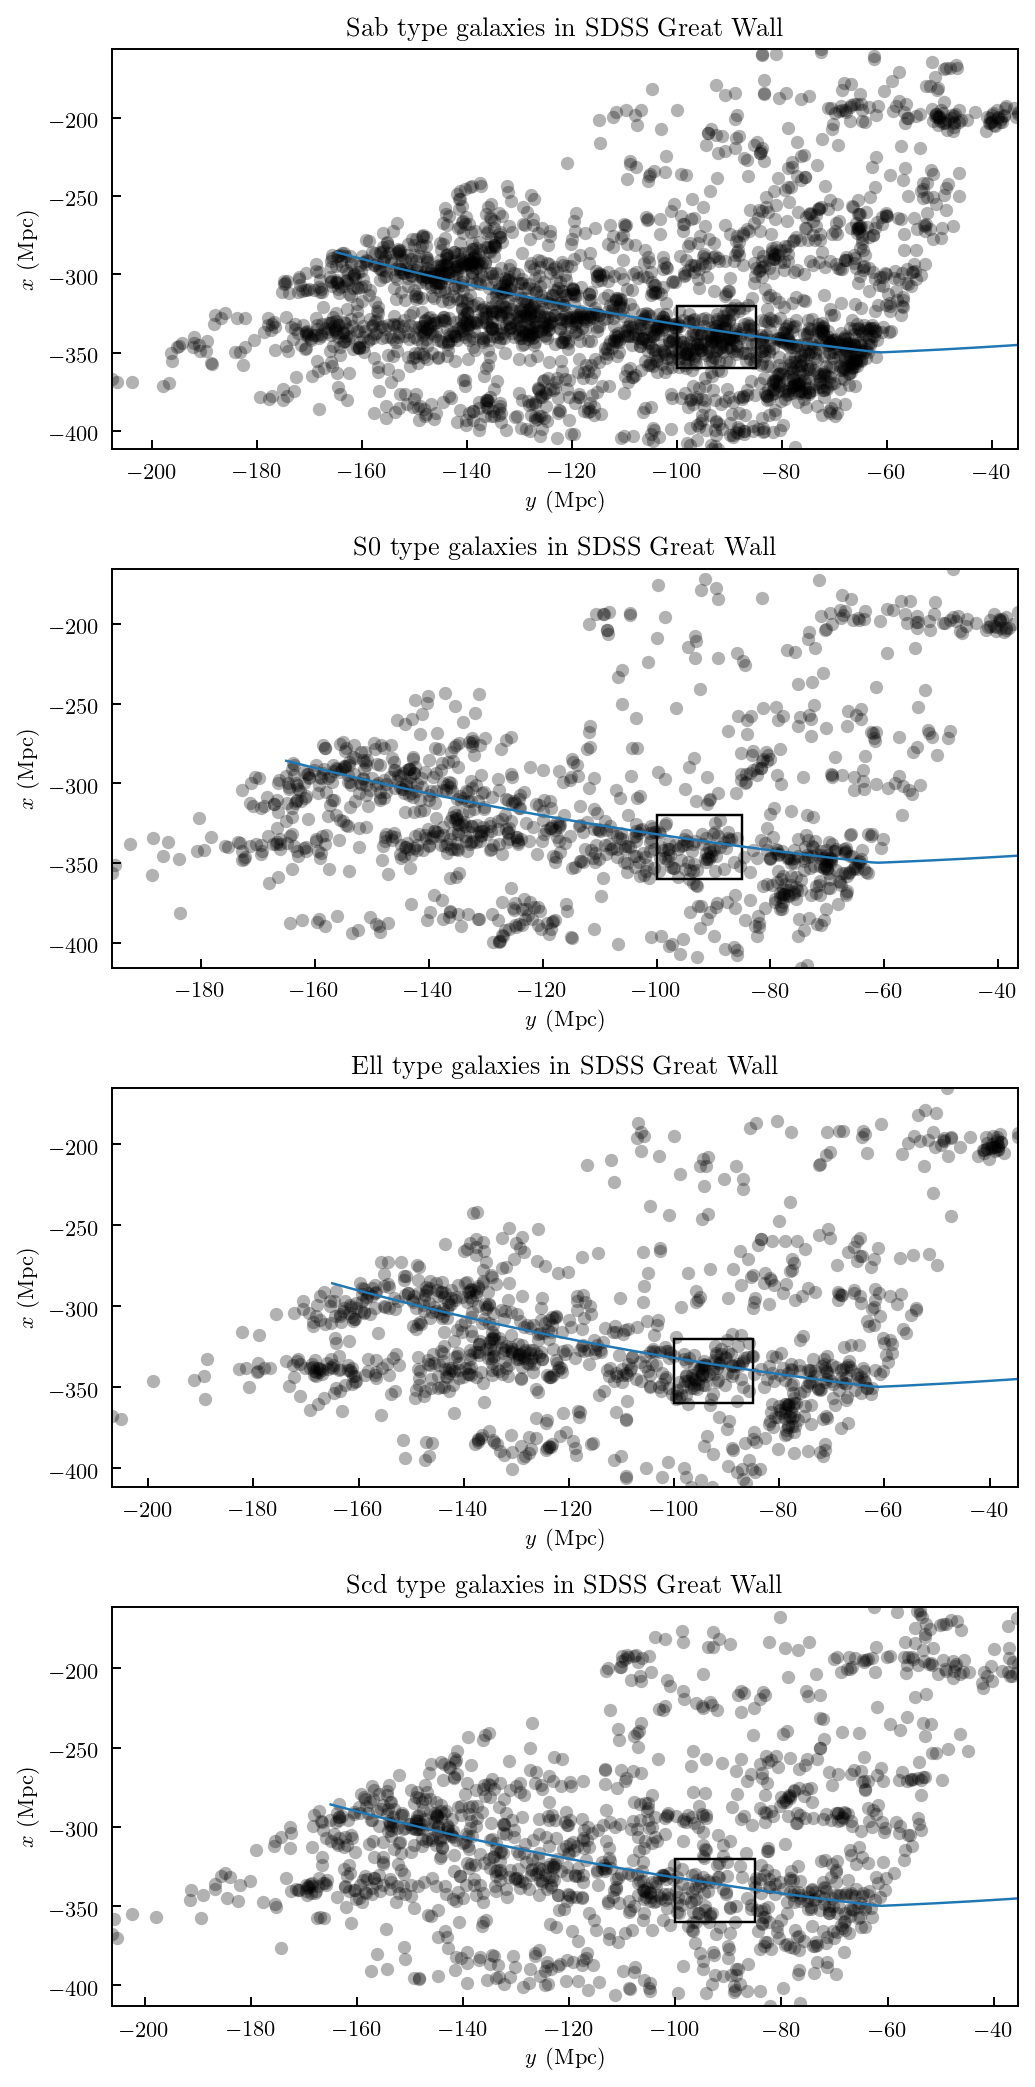

In [153]:
### gets slice for each galaxy type ###

def gal_type_slice(morph, galtypes, pmin):
    '''
    return dict of morph slices for the provided galaxy morphology
    for which p_galtype > pmin and p_galtype > all other p_galtype's.
    '''
    galtypeslices = {}
    for m in galtypes:
        mkey = 'proba{0}'.format(m)
        resttypes = list(set(galtypes) - set([m]))
        restkeys = ['proba{0}'.format(o) for o in resttypes]
        morphslice = ( (morph[mkey] >= morphlim) & (morph[mkey] >= morph[restkeys[0]]) &
                       (morph[mkey] >= morph[restkeys[1]]) & (morph[mkey] >= morph[restkeys[2]])
                     )
        galtypeslices[m] = morphslice
    return galtypeslices
    
# code for 5, contd.

# apply cuts in M, RA, DEC, and z to select bright galaxies 
# in the region of the sky, where the Great Wall is located

RAmin, RAmax = [190, 210]
zmin, zmax   = [0.04, 0.1]
GWslice = ((sdata['dec'] > -7) & (sdata['dec'] < 7) & 
           (sdata['ra'] > RAmin) & (sdata['ra'] < RAmax) & 
           (sdata['z'] > zmin) & (sdata['z'] < zmax) &
           (Mmeert<-20.))

GWdata = sdata[GWslice]
GWmorph = morph[GWslice]
GWd_Lm = d_Lm[GWslice]
gtypes = ['Ell', 'S0', 'Sab', 'Scd']
morphlim = 0.5
gtypeslis = gal_type_slice(GWmorph, gtypes, morphlim)

from matplotlib import patches
figsize = (6, 12)
f, axs = plt.subplots(4,1, figsize = figsize)
for gtype, ax in zip(gtypeslis, axs):
    gtypesli = gtypeslis[gtype]
    gtypeGWdata = GWdata[gtypesli]
    # compute "comoving" distance for plotting spatial coordinates 
    # (see Appendix A.1-A.3 for difference between comoving and Luminosity distance)
    d_C = GWd_Lm[gtypesli]/(1. + gtypeGWdata['z'])

    # construct 2D coordinates using RAs and d_C
    # we are collapsing galaxies with different DECs onto 2D plane
    # because the selected slice in DEC is only 14 degrees - pretty narrow 
    Y = d_C * np.cos(gtypeGWdata['ra'] * np.pi / 180.) 
    X = d_C * np.sin(gtypeGWdata['ra'] * np.pi / 180.)
    
    # plot disjoint "curve" to trace out the GW 
    dGW1 = np.linspace(315, 355, 100)
    dGW2 = np.linspace(355, 330, 100)
    dGW  = np.append(dGW1, dGW2)
    raGW = np.linspace(170, 210, 200)
    XGW  = dGW*np.sin(raGW * np.pi / 180.)
    YGW  = dGW*np.cos(raGW * np.pi / 180.)
    xlims = (np.min(X), np.max(X))
    ylims = (np.min(Y), np.max(Y))
    
    ax.add_patch(patches.Rectangle((-100, -360), width=15, 
                                height=40, fill = False, linewidth = 1))
    # plot distribution of galaxies in the slice around the SDSS Great Wall
    ax.scatter(X, Y, s=30, lw=0, c='k', alpha = 0.3)
    ax.plot(XGW, YGW, lw = 1)
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
#    ax.set_xlim(-400, 300)
#    ax.set_ylim(-400, -150)
    ax.set_xlabel(r'$y\ (\rm Mpc)$')
    ax.set_ylabel(r'$x\ (\rm Mpc)$')
    title = r'{0} type galaxies in SDSS Great Wall'.format(gtype)
    ax.set_title(title)
plt.show()

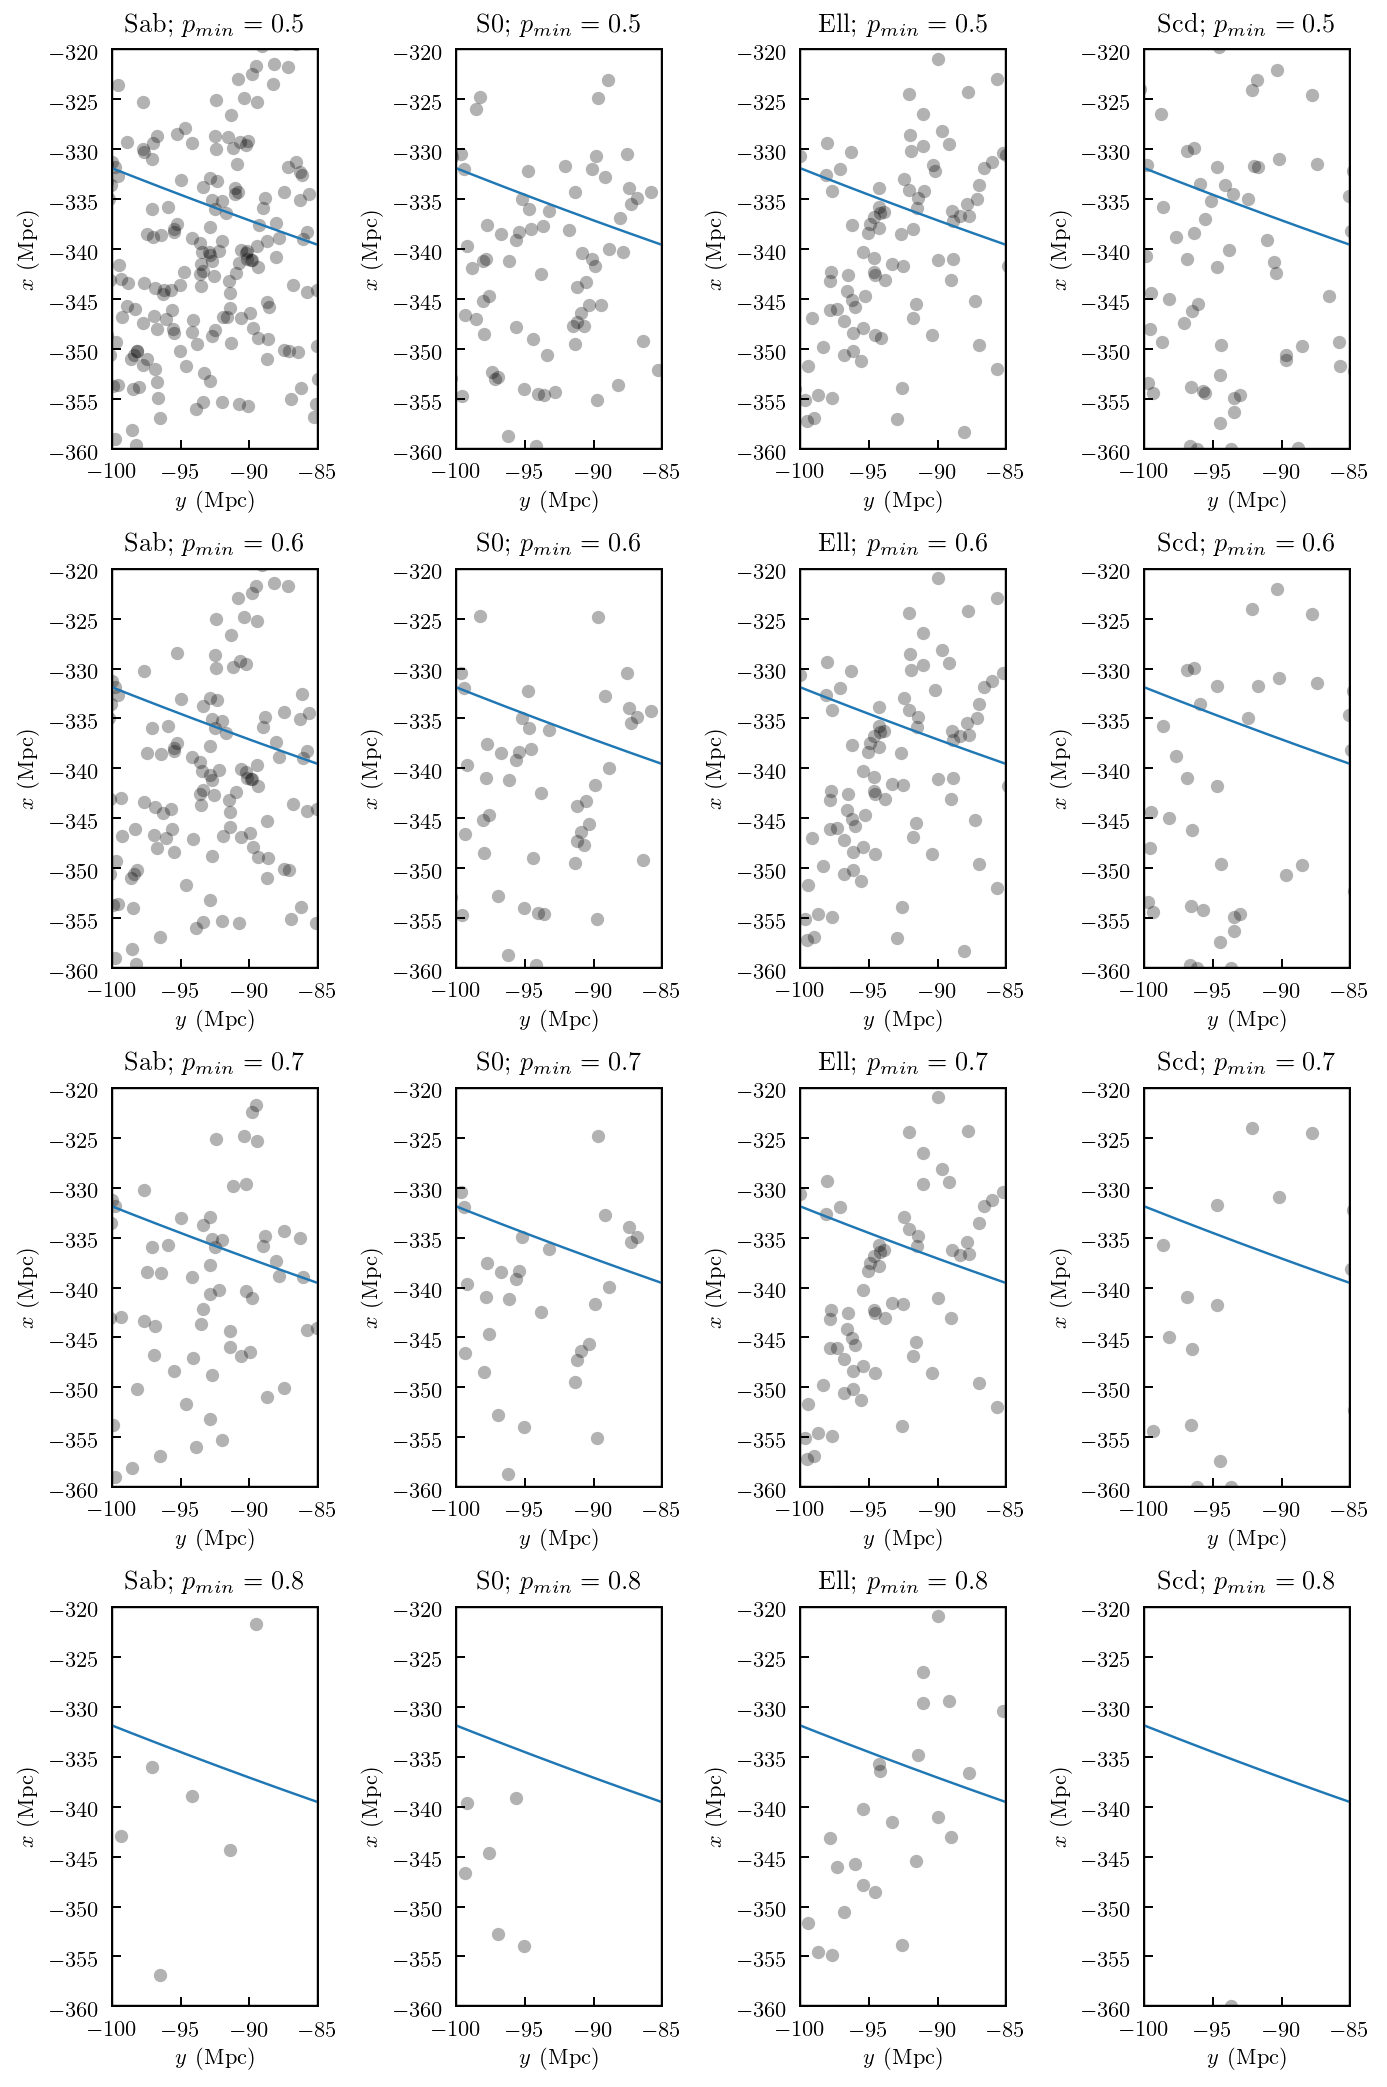

In [182]:
### gets slice for each galaxy type ###

def gal_type_slice(morph, galtypes, pmin):
    '''
    return dict of morph slices for the provided galaxy morphology
    for which p_galtype > pmin and p_galtype > all other p_galtype's.
    '''
    galtypeslices = {}
    for m in galtypes:
        mkey = 'proba{0}'.format(m)
        resttypes = list(set(galtypes) - set([m]))
        restkeys = ['proba{0}'.format(o) for o in resttypes]
        morphslice = ( (morph[mkey] >= morphlim) & (morph[mkey] >= morph[restkeys[0]]) &
                       (morph[mkey] >= morph[restkeys[1]]) & (morph[mkey] >= morph[restkeys[2]])
                     )
        galtypeslices[m] = morphslice
    return galtypeslices
    
# code for 5, contd.

# apply cuts in M, RA, DEC, and z to select bright galaxies 
# in the region of the sky, where the Great Wall is located

RAmin, RAmax = [190, 210]
zmin, zmax   = [0.04, 0.1]
GWslice = ((sdata['dec'] > -7) & (sdata['dec'] < 7) & 
           (sdata['ra'] > RAmin) & (sdata['ra'] < RAmax) & 
           (sdata['z'] > zmin) & (sdata['z'] < zmax) &
           (Mmeert<-20.))

GWdata = sdata[GWslice]
GWmorph = morph[GWslice]
GWd_Lm = d_Lm[GWslice]
gtypes = ['Ell', 'S0', 'Sab', 'Scd']
plims = np.linspace(0.5, 0.8, 4)

from matplotlib import patches
figsize = (8, 12)
f, axs = plt.subplots(len(plims), len(gtypes), figsize = figsize)
icol = 0
for morphlim in plims:
    gtypeslis = gal_type_slice(GWmorph, gtypes, morphlim)
    for gtype, ax in zip(gtypeslis, axs[icol]):
        gtypesli = gtypeslis[gtype]
        gtypeGWdata = GWdata[gtypesli]
        # compute "comoving" distance for plotting spatial coordinates 
        # (see Appendix A.1-A.3 for difference between comoving and Luminosity distance)
        d_C = GWd_Lm[gtypesli]/(1. + gtypeGWdata['z'])

        # construct 2D coordinates using RAs and d_C
        # we are collapsing galaxies with different DECs onto 2D plane
        # because the selected slice in DEC is only 14 degrees - pretty narrow 
        Y = d_C * np.cos(gtypeGWdata['ra'] * np.pi / 180.) 
        X = d_C * np.sin(gtypeGWdata['ra'] * np.pi / 180.)

        # plot disjoint "curve" to trace out the GW 
        dGW1 = np.linspace(315, 355, 100)
        dGW2 = np.linspace(355, 330, 100)
        dGW  = np.append(dGW1, dGW2)
        raGW = np.linspace(170, 210, 200)
        XGW  = dGW*np.sin(raGW * np.pi / 180.)
        YGW  = dGW*np.cos(raGW * np.pi / 180.)
        xlims = (np.min(X), np.max(X))
        ylims = (np.min(Y), np.max(Y))

        xmin, ymin = [-100, -360]
        dx, dy = [15, 40]
        ax.add_patch(patches.Rectangle((-100, -360), width=15, 
                                    height=40, fill = False, linewidth = 1))
        # plot distribution of galaxies in the slice around the SDSS Great Wall
        ax.scatter(X, Y, s=30, lw=0, c='k', alpha = 0.3)
        ax.plot(XGW, YGW, lw = 1)
        ax.set_xlim(xmin, xmin + dx)
        ax.set_ylim(ymin, ymin + dy)
    #    ax.set_xlim(-400, 300)
    #    ax.set_ylim(-400, -150)
        ax.set_xlabel(r'$y\ (\rm Mpc)$')
        ax.set_ylabel(r'$x\ (\rm Mpc)$')
        title = r'{0}; \(p_{{min}} = {1}\)'.format(gtype, morphlim)
        ax.set_title(title)
    icol += 1
plt.show()

Caption: From top to bottom, increasing probability lower limits from 0.5 to 0.8 in steps of 0.1. From left to right, changing galaxy morphology based on $ p_{type} > p_{min} \ge p_{rest}$ where $p_{rest}$ is the probability of classification into any of the other galaxy morphologies. The blue line traces the much larger scale Great Wall structure. To look for biases in the morphology classification, we plot the same 15x40 Mpc region centered on the boxed region in the above set of figures. It is immediately clear that it is more difficult for this algorithm to classify Scds than Ellipticals as, for decreasing $p_{min}$, the increase in Scd number is steeper than the corresponding increase in number of ellipticals. This is perhaps due to differences in brightness since tightly clustered ellipticals tend to be exceptionally bright. However, we can still make a definitive statement about the difference in clustering as, even in the hard-to-trust $p_{min} > 0.5 $ plots, we can see that the ellipticals are tightly clustered along a line moving from bottom-left to top-right, while

Elliptical number density order of magnitude higher than Scd. 
We can assume that older galaxies would tend to be more clustered along the "cosmic web" because they would have more time to fall into large scale potential wells. Scd's are blue, young spirals and are hence more dispersed about the cosmic than older, redder galaxies.



In [102]:
dGW2

100

<b>Extra credit. (5 points)</b> The Hubble scale is defined as $c/H_0$ where $H_0\approx 70$ km/s/Mpc is the value of the Hubble "constant" at $z=0$. The mean density of matter in the universe can be expressed as $\bar{\rho}_{\rm m}=\Omega_{\rm m,0}\rho_{\rm cr,0}$, where current measurements indicate $\Omega_{\rm m,0}\approx 0.3$ and $\rho_{\rm cr,0}\equiv 3H_0^2/(8\pi G)$ is the critical density of the universe at $z=0$. Given these facts and your estimate for $M(250\ \mathrm{kpc})$ in the exercise 2 above, how many galaxies like the Milky Way could potentially form in the sphere of radius $c/H_0$?

We start with finding the absolute upper bound on $N_{MW}$ by considering all the matter in the Hubble sphere to be potential MW seeds. We simply total all matter in the universe to find the total mass available to form Milky Way mass galaxies.

To get the the critical/avg density today in convenient units, we again use $ G M_\odot = 4.30 \times 10^{-9} \text{ Mpc} \text{ km}^{2} \text{s}^{-2} $    
s.t.    

$$ \rho_{0} = \frac{3 H_0^2}{8\pi G} = \frac{3 H_0^2}{8\pi (G M_\odot)} M_\odot \simeq 10^{10} ~ M_\odot \text{ Mpc}^{-3}$$.

and find the total available mass in the Hubble volume $ V_{hubb} = 4/3 \pi R_{hub}^3 $ where $R_{hubb} = c/H_0 = 3 \times 10^5 / 70$ Mpc $\simeq 4 \times 10^4 $ Mpc s.t.

$$ V_{hubb} = 4/3 \pi R_{hub}^3 \simeq 2 \times 10^{14} \text{ Mpc}^3$$ 

and now $M_{Hubb} = V_{hubb}\bar{\rho}_{0}\Omega_m = 6 \times 10^{23} M_\odot$. Finally,

$$N_{MW, max} = M_{hubb}/M_{MW} = 6 \times 10^{11}$$ 

which gives a number density $n_{MW, max} = N_{MW, max} / V_{Hubb} = 3 \times 10^{-3} \text{ Mpc}^{-3}  $  which gives a characteristic volume of $\sim 300 \text{ Mpc}^{3} \implies $ a length scale $ \sim 6 \text{ Mpc} = 6000 \text{ kpc}$, 20x  larger (8000x) than our halo (volume) for the Milky Way of $\sim 250 \text{ kpc}$. This difference in scale highlights the fact that (i) The Milky Way halo is much denser than the rest of the universe (expectedly), and (ii) If all the matter in the universe formed only Milky Way mass galaxies completely homogeneously, then we would still be $ \sim 6 $ Mpc from the nearest MW type galaxy; to reiterate, this is a lower limit since not all galaxies in the universe are Milky Way mass. This lower limit is instantly violated when we consider M31's sub-Mpc distance from us. As a result, we can further posit that there are larger structures of overdensities in the universe that contain several galaxies i.e. galaxy distribution in universe is not homogeneous.